In [1]:
import numpy as np
import pandas as pd
from pair_trading_foundations.utils import examine_output_data
import pickle

## Load the generated file (Feature + Label + Metadata Combined)

In [2]:
with open('Data/spotcheckout_output.pkl','rb') as file:
    sample_output = pickle.load(file)

In [3]:
sample_output[['Ticker_P1','Ticker_P2']].drop_duplicates().shape

(45, 2)

In [4]:
tb = sample_output.drop('trade_executions', axis=1).dropna().reset_index(drop=True)
tb.pnls.describe()

count    6390.000000
mean        0.001536
std         0.044402
min        -0.208753
25%         0.000000
50%         0.000000
75%         0.000000
max         0.240316
Name: pnls, dtype: float64

## Sampling any pnl that is not 0 and examine

In [5]:
sample_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56655 entries, 0 to 56654
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       56655 non-null  object 
 1   Ticker_P1                  56655 non-null  object 
 2   Close_P1                   56655 non-null  float64
 3   Ticker_P2                  56655 non-null  object 
 4   Close_P2                   56655 non-null  float64
 5   abs_spread                 56655 non-null  float64
 6   abs_spread_mean            34200 non-null  float64
 7   abs_spread_std             34200 non-null  float64
 8   abs_spread_mean_l28        55440 non-null  float64
 9   abs_spread_std_l28         55440 non-null  float64
 10  spread_normed              34200 non-null  float64
 11  abs_spread_normed_max      11745 non-null  float64
 12  abs_spread_normed_90th     11745 non-null  float64
 13  abs_spread_normed_75th     11745 non-null  flo

In [25]:
# sample 
sampled_record = sample_output[sample_output.pnls>0].sample(1)

# sampled_record = sample_output[sample_output.pnls==sample_output.pnls.max()]
sampled_record

,Date,Ticker_P1,Close_P1,Ticker_P2,Close_P2,abs_spread,abs_spread_mean,abs_spread_std,abs_spread_mean_l28,abs_spread_std_l28,...,abs_spread_normed_max,abs_spread_normed_90th,abs_spread_normed_75th,abs_spread_normed_median,abs_spread_normed_l7_avg,abs_spread_normed_l14_avg,cos_sim,corr_coef,pnls,trade_executions
18678,2023-03-07,AVB,164.472168,VRSK,183.010071,18.537903,14.515777,10.424954,7.067017,5.929385,...,2.346885,1.514338,1.214,0.852084,0.50503,0.815822,0.996814,0.761211,0.026813,exit_idx entry_idx stock1_price_entry st...


## Visualize the data for spotchecking

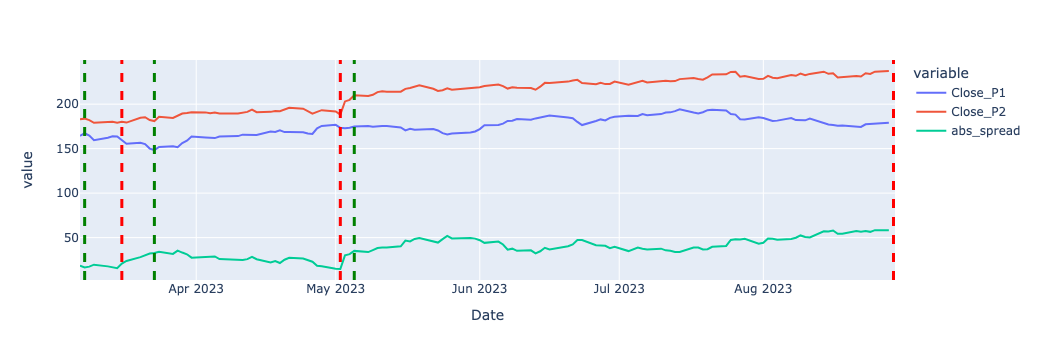

In [26]:
examine_output_data(
    tb=sample_output,
    ticker1=sampled_record.Ticker_P1.values[0],
    ticker2=sampled_record.Ticker_P2.values[0],
    date=sampled_record.Date.values[0]
)

In [27]:
## Display the trade execution details

In [28]:
sampled_record.trade_executions.values[0]

,exit_idx,entry_idx,stock1_price_entry,stock1_price_exit,stock2_price_entry,stock2_price_exit,long_stock_1,pnl,entry_dates,exit_dates
0,6,0,167.313705,159.376663,183.725616,180.088730,False,1.382144,2023-03-08,2023-03-16
1,38,11,148.405426,173.460968,181.034653,188.163696,True,6.472613,2023-03-23,2023-05-02
2,120,41,174.920670,180.573975,209.969131,238.480469,True,-5.173449,2023-05-05,2023-08-29


# Challenges

1. There are 119316 stock pairs. It takes ~45 mins to generate the training data for 1000 pairs and hence the runtime could be an issue.
3. The basic features are weak predictors therefore we need to invest more time in feature engineering
4. Lots of zeros in the label is creating an imbalanced problem. (e.g. 60% in the sample output)